In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import requests as r
import geopy as gp
import pyarrow as pa


In [11]:
# geojson files

state = "admin_1_state.geojson"
district = "admin_2_district.geojson"

state_gdf = gpd.read_file(state)
district_gdf = gpd.read_file(district)

state_gdf.loc[~state_gdf.code_state.isin([12, 13, 15]), 'geometry'] = state_gdf.geometry.translate(9, 4.5)  # More compact Msia map
district_gdf.loc[~district_gdf.code_state.isin([12, 13, 15]), 'geometry'] = district_gdf.geometry.translate(9, 4.5)  # More compact Msia map


In [12]:
# call the data from url

hies_state = 'https://storage.dosm.gov.my/hies/hies_state.parquet'

hies_state_df = pd.read_parquet(hies_state)
if 'date' in hies_state_df.columns: hies_state_df['date'] = pd.to_datetime(hies_state_df['date'])

hies_district = 'https://storage.dosm.gov.my/hies/hies_district.parquet'

hies_district_df = pd.read_parquet(hies_district)
if 'date' in hies_district_df.columns: hies_district_df['date'] = pd.to_datetime(hies_district_df['date'])

In [13]:
# Merge and convert state columns to lowercase

state_gdf['state'] = state_gdf['state'].str.lower()
hies_state_df['state'] = hies_state_df['state'].str.lower()

state_gdf_combined = state_gdf.merge(hies_state_df, how='left', on='state')


In [14]:
# drop duplicating columns
district_gdf = district_gdf.drop(columns=['state'])

# Merge and convert district columns to lowercase

district_gdf['district'] = district_gdf['district'].str.lower()
hies_district_df['district'] = hies_district_df['district'].str.lower()


district_gdf_combined = district_gdf.merge(hies_district_df, how='left', on='district')

In [ ]:
states_gdf_combined = state_gdf_combined.to_crs('urn:ogc:def:crs:OGC:1.3:CRS84')
district_gdf_combined = district_gdf_combined.to_crs('urn:ogc:def:crs:OGC:1.3:CRS84')

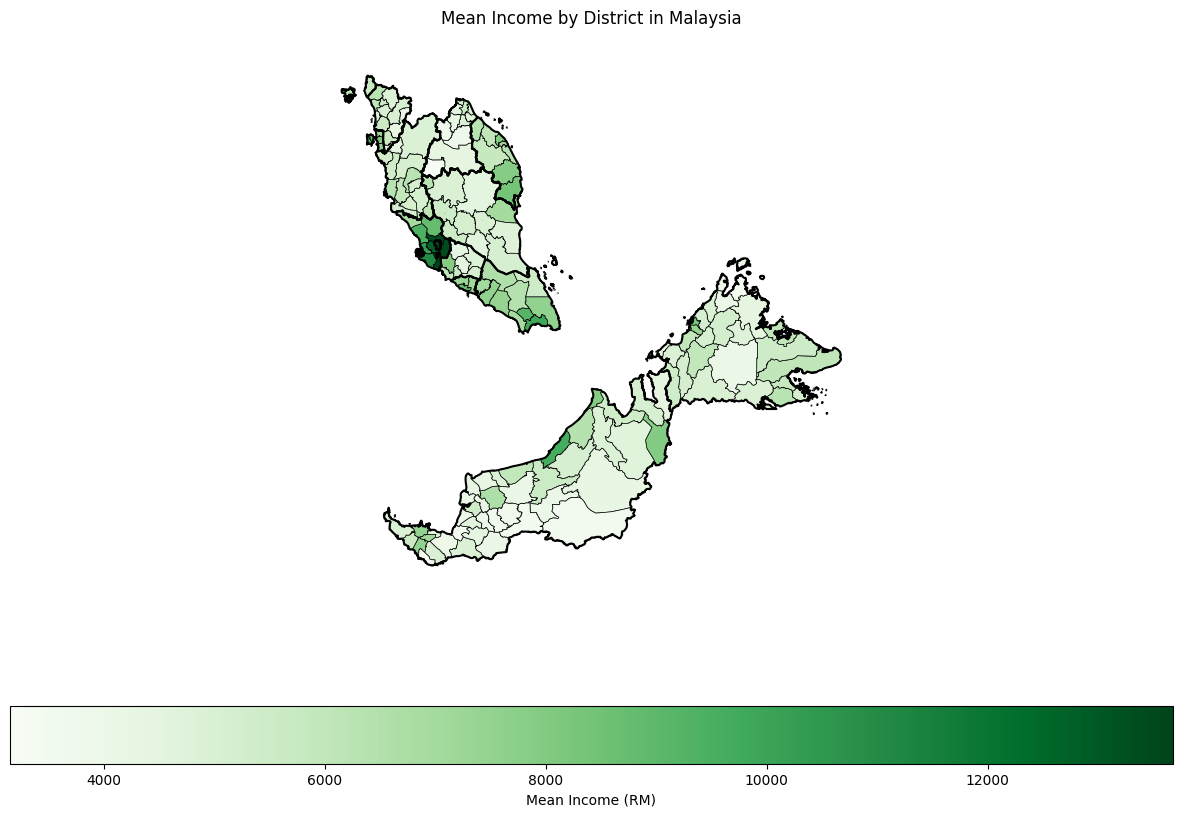

In [ ]:
# Create a figure and axis

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the heatmap using the income_mean column
state_gdf_combined.boundary.plot(
    ax=ax,
    linewidth=1.5,
    edgecolor='black',
    facecolor='none')

district_gdf_combined.plot(
    column='income_mean',
    ax=ax,
    legend=True,
    legend_kwds={'label': 'Mean Income (RM)',
                'orientation': 'horizontal'},
    missing_kwds={'color': 'lightgrey'},
    cmap='Greens',
    edgecolor='black',
    linewidth=0.5)

# Remove axes
ax.axis('off')

# Add a title
plt.title('Mean Income by District in Malaysia', pad=20)

# plt.tight_layout()
plt.show()

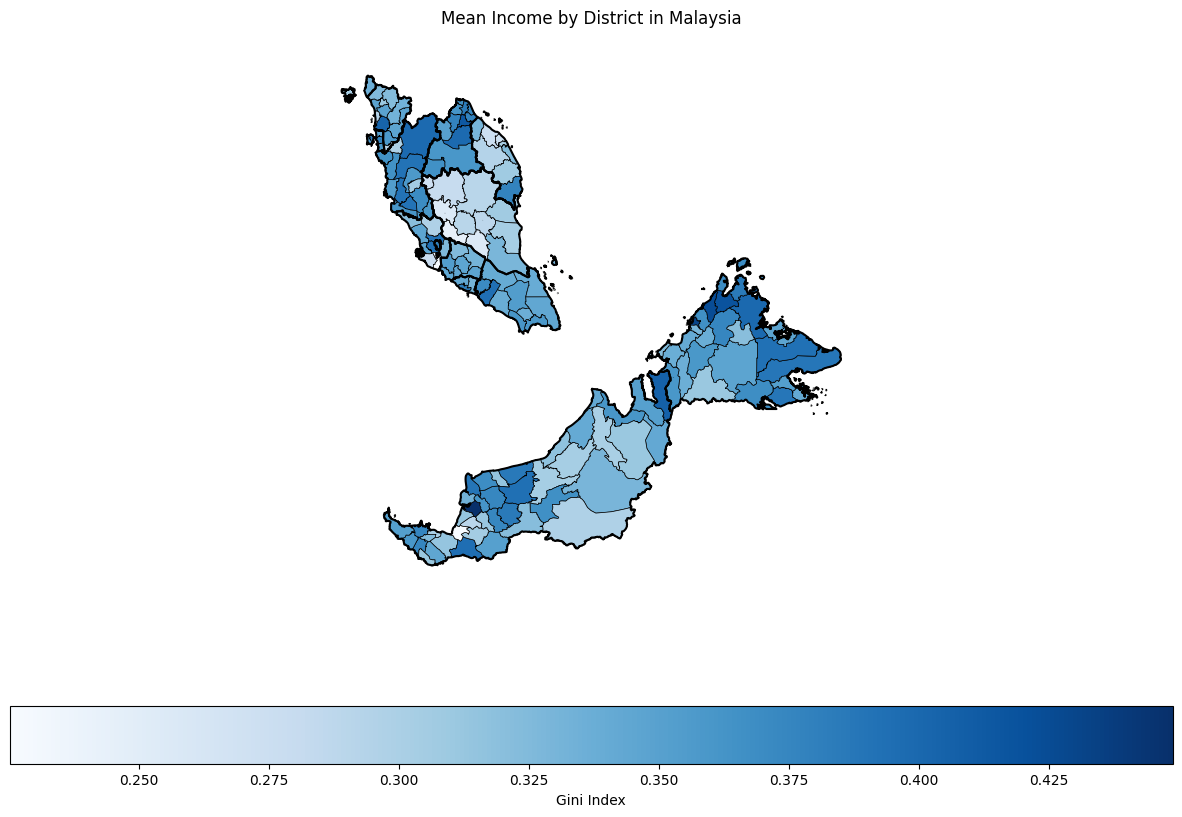

In [19]:
# Plot the heatmap using the income_mean column
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

state_gdf_combined.boundary.plot(
    ax=ax,
    linewidth=1.5,
    edgecolor='black',
    facecolor='none')

district_gdf_combined.plot(
    column='gini',
    ax=ax,
    legend=True,
    legend_kwds={'label': 'Gini Index',
                'orientation': 'horizontal'},
    missing_kwds={'color': 'lightgrey'},
    cmap='Blues',
    edgecolor='black',
    linewidth=0.5)

# Remove axes
ax.axis('off')

# Add a title
plt.title('Mean Income by District in Malaysia', pad=20)

# plt.tight_layout()
plt.show()

In [ ]:
# Plot the heatmap using the income_mean column
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

state_gdf_combined.boundary.plot(
    ax=ax,
    linewidth=1.5,
    edgecolor='black',
    facecolor='none')

district_gdf_combined.plot(
    column='gini',
    ax=ax,
    legend=True,
    legend_kwds={'label': 'Gini Index',
                'orientation': 'horizontal'},
    missing_kwds={'color': 'lightgrey'},
    cmap='Blues',
    edgecolor='black',
    linewidth=0.5)

# Remove axes
ax.axis('off')

# Add a title
plt.title('Mean Income by District in Malaysia', pad=20)

# plt.tight_layout()
plt.show()

In [17]:
state_gdf_combined

,state,code_state,geometry,date,income_mean,income_median,expenditure_mean,gini,poverty
0,selangor,10,"MULTIPOLYGON (((110.75335 7.31998, 110.76121 7...",2022-01-01,12233,9983,6770,0.36123,1.5
1,pahang,6,"MULTIPOLYGON (((112.97876 7.20211, 112.9829 7....",2022-01-01,5777,4753,4107,0.30770,6.3
2,pulau pinang,7,"MULTIPOLYGON (((109.53714 9.7666, 109.55256 9....",2022-01-01,8267,6502,5322,0.37058,2.0
3,sarawak,13,"MULTIPOLYGON (((110.08588 1.73311, 110.08633 1...",2022-01-01,6457,4978,3915,0.38180,10.8
4,kedah,2,"MULTIPOLYGON (((109.73755 9.80512, 109.73819 9...",2022-01-01,5550,4402,3765,0.35938,9.0
5,perak,8,"MULTIPOLYGON (((109.76086 8.5423, 109.76443 8....",2022-01-01,5779,4494,3903,0.36769,7.5
6,sabah,12,"MULTIPOLYGON (((118.67977 4.07375, 118.68236 4...",2022-01-01,6171,4577,3342,0.39491,19.7
7,kelantan,3,"MULTIPOLYGON (((110.81465 9.25934, 110.80524 9...",2022-01-01,4885,3614,3505,0.38540,13.2
8,negeri sembilan,5,"MULTIPOLYGON (((111.62481 7.12871, 111.62382 7...",2022-01-01,6788,5226,4678,0.36853,4.4
9,w.p. kuala lumpur,14,"MULTIPOLYGON (((110.66725 7.74432, 110.67329 7...",2022-01-01,13325,10234,7823,0.37960,1.4
